# Importing Libraries


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, mean_squared_error,balanced_accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_text, plot_tree


# Importing the data set


In [117]:
train = pd.read_csv("/content/loan-train.csv")
test = pd.read_csv("/content/loan-test.csv")

In [118]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [119]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [120]:
print(train.shape, test.shape)

(614, 12) (367, 11)


#  Data Visualization


## Categorical Variable 

### Gender

In [121]:
train.Gender.value_counts(dropna = False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

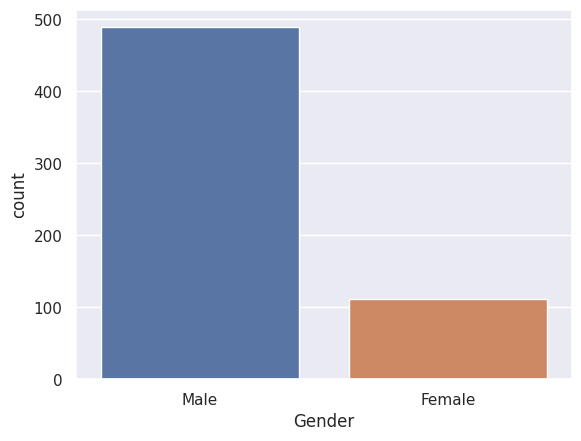

In [122]:
sns.countplot(x="Gender", data = train)
plt.show()

In [123]:
count_male = len(train[train.Gender == 'Male'])
count_female = len(train[train.Gender == 'Female'])
count_null = len(train[train.Gender.isnull()])

print("Percentage of Male applicant: {:.2f} %".format((count_male / (len(train.Gender))*100)))
print("Percentage of Female applicant: {:.2f} %".format((count_female / (len(train.Gender))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Gender))*100)))

Percentage of Male applicant: 79.64 %
Percentage of Female applicant: 18.24 %
Missing values percentage: 2.12 %


We can observe that the number of male applicants is higher compared to female applicants. Also there are missing values in this column.

### Married

In [124]:
train.Married.value_counts(dropna = False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

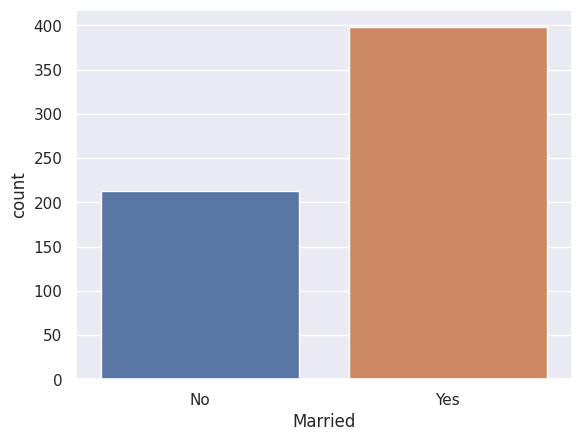

In [125]:
sns.countplot(x = "Married", data = train)
plt.show()

Number of applicants that has been married is significantly higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column as well.

In [126]:
count_married = len(train[train.Married == 'Yes'])
count_non_married = len(train[train.Married == 'No'])
count_null = len(train[train.Married.isnull()])

print("Percentage of married: {:.2f} %".format((count_married / (len(train.Married))*100)))
print("Percentage of Non married applicant: {:.2f} %".format((count_non_married / (len(train.Married))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Married))*100)))

Percentage of married: 64.82 %
Percentage of Non married applicant: 34.69 %
Missing values percentage: 0.49 %


### Education

In [127]:
train.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

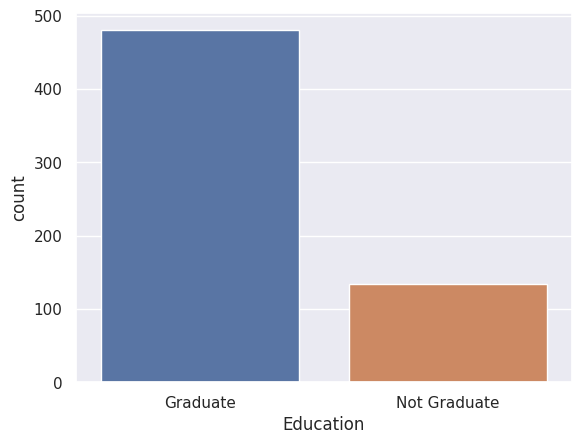

In [128]:
sns.countplot(x = "Education", data = train)
plt.show()

In [129]:
count_graduate = len(train[train.Education == 'Graduate'])
count_not_graduate = len(train[train.Education == 'Not Graduate'])
count_null = len(train[train.Education.isnull()])

print("Percentage of graduate applicant: {:.2f} %".format((count_graduate / (len(train.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f} %".format((count_not_graduate / (len(train.Education))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Education))*100)))

Percentage of graduate applicant: 78.18 %
Percentage of Not graduate applicant: 21.82 %
Missing values percentage: 0.00 %


The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

### Self Employed

In [130]:
train.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

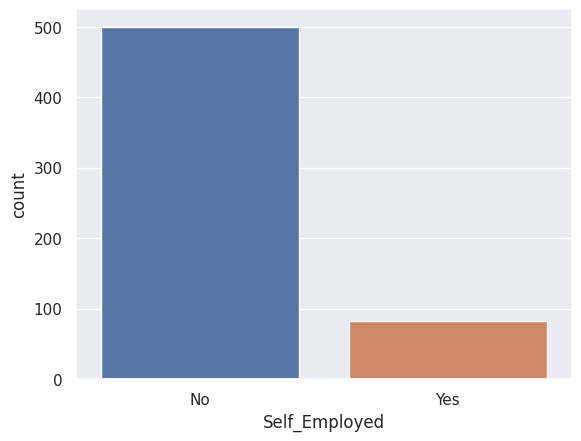

In [131]:
sns.countplot(x = "Self_Employed", data = train)
plt.show()

In [132]:
count_no = len(train[train.Self_Employed == 'No'])
count_yes = len(train[train.Self_Employed == 'Yes'])
count_null = len(train[train.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f} %".format((count_no / (len(train.Self_Employed))*100)))
print("Percentage of self employed: {:.2f} %".format((count_yes / (len(train.Self_Employed))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Self_Employed))*100)))

Percentage of Not self employed: 81.43 %
Percentage of self employed: 13.36 %
Missing values percentage: 5.21 %


The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

### Credit History

In [133]:
train.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

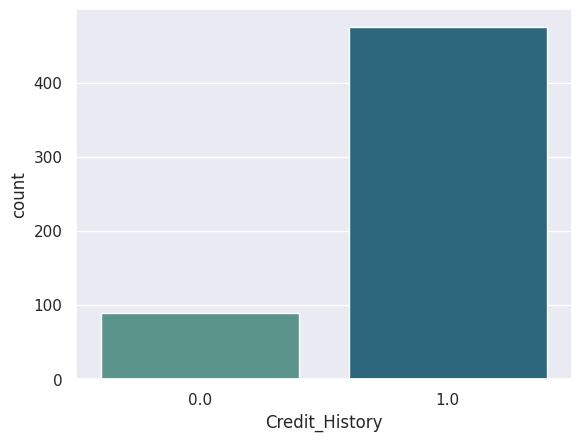

In [134]:
sns.countplot(x = "Credit_History", data = train, palette = "crest")
plt.show()

In [135]:
count_1 = len(train[train.Credit_History == 1])
count_0 = len(train[train.Credit_History == 0])
count_null = len(train[train.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f} %".format((count_1 / (len(train.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f} %".format((count_0 / (len(train.Credit_History))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Credit_History))*100)))

Percentage of Good credit history: 77.36 %
Percentage of Bad credit history: 14.50 %
Missing values percentage: 8.14 %


👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### Property Area

In [136]:
train.Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Area, dtype: int64

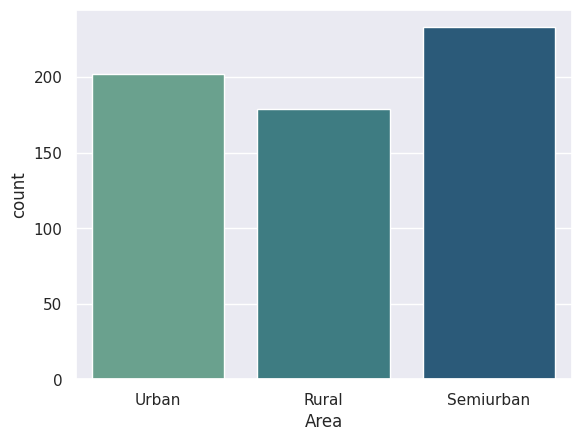

In [137]:
sns.countplot(x = "Area", data = train, palette="crest")
plt.show()

In [138]:
count_urban = len(train[train.Area == 'Urban'])
count_rural = len(train[train.Area == 'Rural'])
count_semi_urban = len(train[train.Area == 'Semiurban'])
count_null = len(train[train.Area.isnull()])

print("Percentage of Urban: {:.2f} %".format((count_urban / (len(train.Area))*100)))
print("Percentage of Rural: {:.2f} %".format((count_rural / (len(train.Area))*100)))
print("Percentage of Semiurban: {:.2f} %".format((count_semi_urban / (len(train.Area))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Area))*100)))

Percentage of Urban: 32.90 %
Percentage of Rural: 29.15 %
Percentage of Semiurban: 37.95 %
Missing values percentage: 0.00 %


This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

### Loan Status

In [139]:
train.Status.value_counts(dropna=False)

Y    422
N    192
Name: Status, dtype: int64

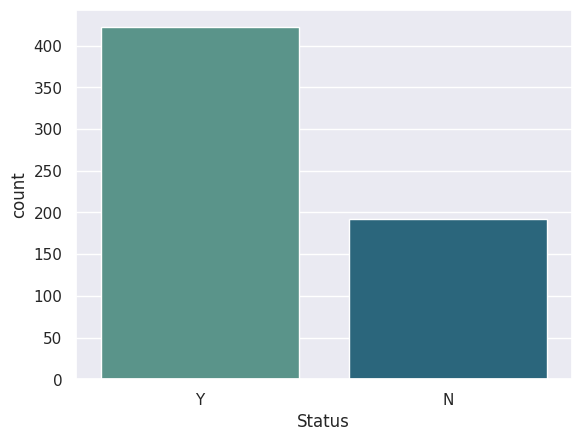

In [140]:
sns.countplot(x = "Status", data = train, palette = "crest")
plt.show()

In [141]:
count_Y = len(train[train.Status == 'Y'])
count_N = len(train[train.Status == 'N'])
count_null = len(train[train.Status.isnull()])

print("Percentage of Approved: {:.2f} %".format((count_Y / (len(train.Status))*100)))
print("Percentage of Rejected: {:.2f} %".format((count_N / (len(train.Status))*100)))
print("Missing values percentage: {:.2f} %".format((count_null / (len(train.Status))*100)))

Percentage of Approved: 68.73 %
Percentage of Rejected: 31.27 %
Missing values percentage: 0.00 %


The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### Loan Amount Term

In [142]:
train.Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Term, dtype: int64

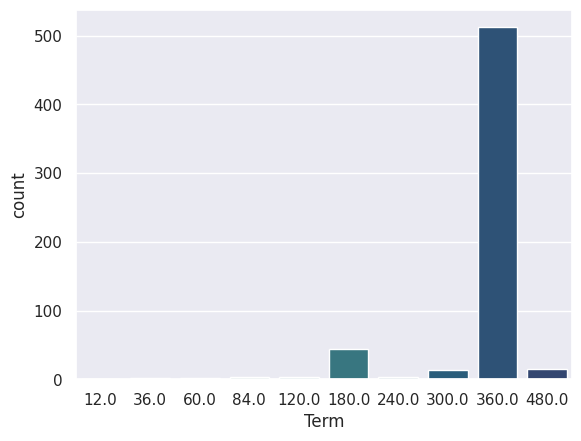

In [143]:
sns.countplot(x = "Term", data = train, palette = "crest")
plt.show()

In [144]:
train.Term.value_counts()/len(train) * 100

360.0    83.387622
180.0     7.166124
480.0     2.442997
300.0     2.117264
240.0     0.651466
84.0      0.651466
120.0     0.488599
60.0      0.325733
36.0      0.325733
12.0      0.162866
Name: Term, dtype: float64

As can be seen from the results, the 360 days loan duration is the most popular compared to others.

## Numerical Variable

### Describing Numerical Variable


In [145]:
train[['Applicant_Income','Coapplicant_Income','Loan_Amount']].describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### Distribution of Numerical Variables

#### Histogram Distribution

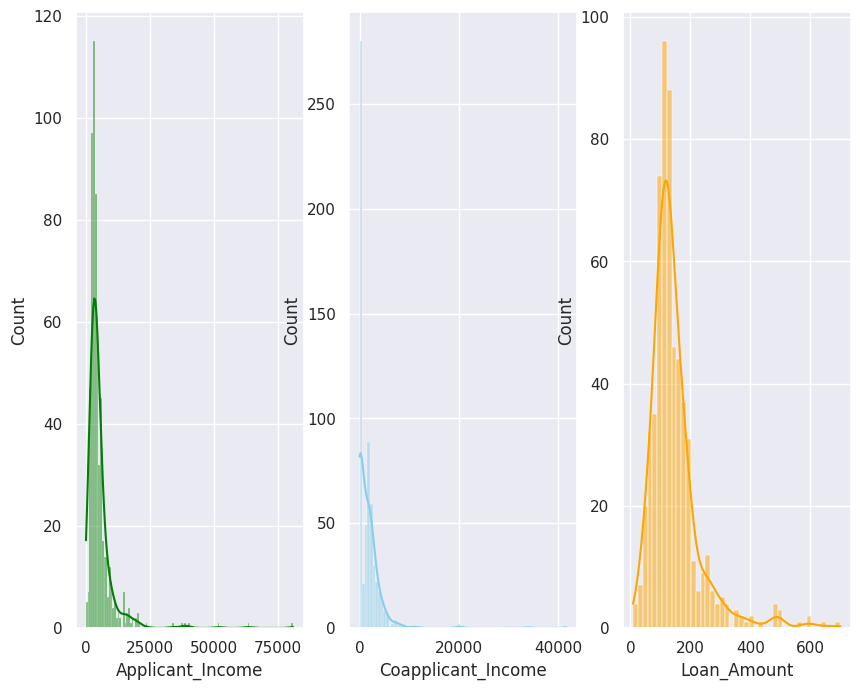

In [146]:
sns.set(style = "darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
plt.subplot(1,3,1)
sns.histplot(data = train, x = "Applicant_Income", kde = True, color = 'green')
plt.subplot(1,3,2)
sns.histplot(data = train, x = "Coapplicant_Income", kde = True, color = 'skyblue')
plt.subplot(1,3,3)
sns.histplot(data = train, x = "Loan_Amount", kde = True, color = 'orange');

### Heatmap

<Axes: >

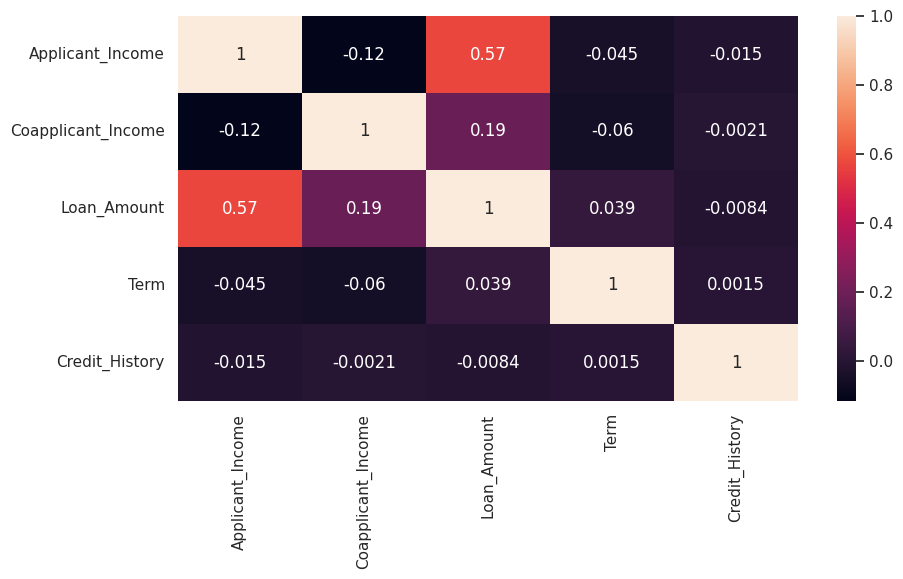

In [147]:
plt.figure(figsize = (10,5))
sns.heatmap(train.corr(), annot = True)

We observe positive correlation between Loan Amount and Applicant Income.

### Categorical v/s Categorical

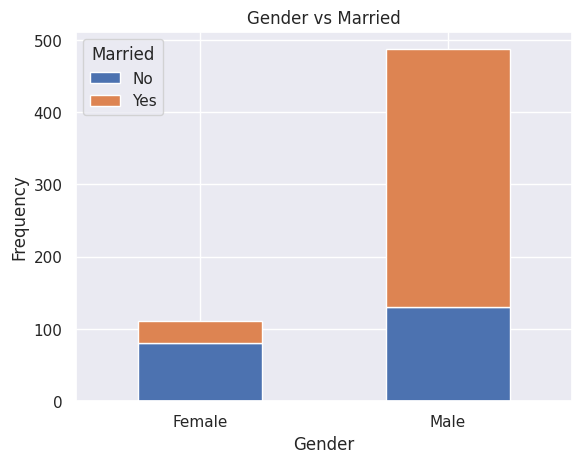

In [148]:
pd.crosstab(train.Gender, train.Married).plot(kind = "bar", stacked = True)
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compared to female applicants that had not married.

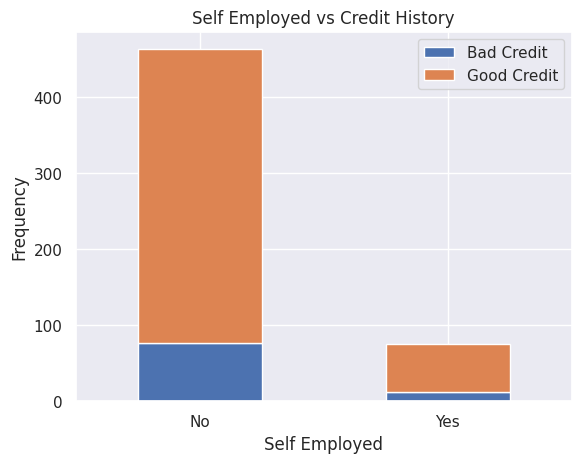

In [149]:
pd.crosstab(train.Self_Employed, train.Credit_History).plot(kind = "bar", stacked = True)
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation = 0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

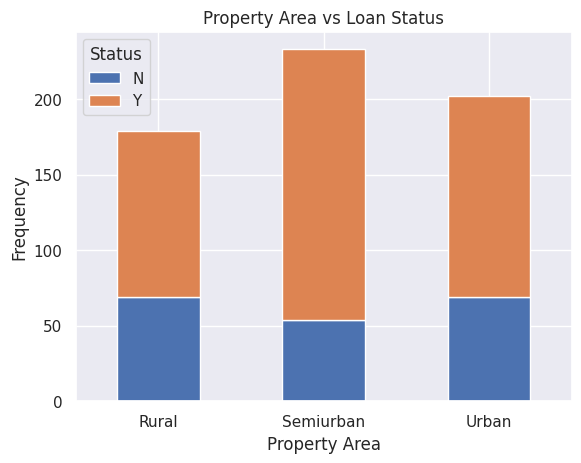

In [150]:
pd.crosstab(train.Area, train.Status).plot(kind = "bar", stacked = True)
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

Most of loans that got accepted has property in Semiurban compared to Urban and Rural.

### Numerical v/s Numerical

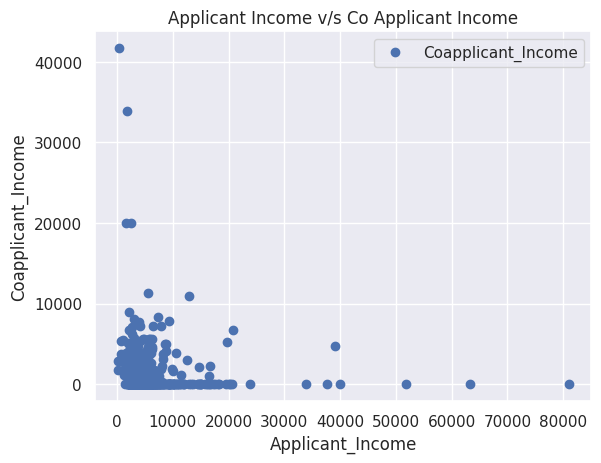

Pearson correlation: -0.11660458122889966
T Test and P value: 
 Ttest_indResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40)


In [151]:
train.plot(x = 'Applicant_Income', y = 'Coapplicant_Income', style = 'o')  
plt.title('Applicant Income v/s Co Applicant Income')  
plt.xlabel('Applicant_Income')
plt.ylabel('Coapplicant_Income')  
plt.show()
print('Pearson correlation:', train['Applicant_Income'].corr(train['Coapplicant_Income']))
print('T Test and P value: \n', stats.ttest_ind(train['Applicant_Income'], train['Coapplicant_Income']))

There exists negative correlation between Applicant income and Co Applicant Income.

The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46.


# Data Preprocessing

## Dealing with null values

In [152]:
train.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

### Data Imputation for categorical variables


In [153]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0],inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace = True)
train['Term'].fillna(train['Term'].mode()[0],inplace = True)

Similarly we impute for the test set as well.

In [154]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)
test['Married'].fillna(test['Married'].mode()[0],inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace = True)
test['Term'].fillna(test['Term'].mode()[0],inplace = True)

### Data Imputation for numerical variables

In [155]:
train['Loan_Amount'].fillna(train['Loan_Amount'].mean(),inplace = True)

In [156]:
test['Loan_Amount'].fillna(test['Loan_Amount'].mean(),inplace = True)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=23,shuffle=True,test_size=0.2)


## One-hot Encoding

In [158]:
train = pd.get_dummies(train)

# Drop columns
train = train.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
train.rename(columns = new, inplace = True)

In [159]:
test = pd.get_dummies(test)

# Drop columns
test = test.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
test.rename(columns = new, inplace = True)

## Removing outliers

In [160]:
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3 - q1

train = train[~((train < (q1 - 1.5 * iqr)) |(train > (q3 + 1.5 * iqr))).any(axis = 1)]

In [161]:
q1 = test.quantile(0.25)
q3 = test.quantile(0.75)
iqr = q3 - q1

test = test[~((test < (q1 - 1.5 * iqr)) |(test > (q3 + 1.5 * iqr))).any(axis = 1)]

## Separating target variable from the train dataset

In [162]:
train.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban', 'Status_Y'],
      dtype='object')

In [163]:
test.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History', 'Gender', 'Married', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education', 'Self_Employed',
       'Area_Rural', 'Area_Semiurban', 'Area_Urban'],
      dtype='object')

In [164]:
X = train.drop(["Status_Y"], axis = 1)
Y = train["Status_Y"]

## Balancing the Dataset

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fit the scaler to the X_train and use it to transform X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_scaled_resampled, Y_train_resampled = ros.fit_resample(X_train_scaled, Y_train)

In [167]:
Y_train_resampled.value_counts()

1    91
0    91
Name: Status_Y, dtype: int64

## Data Normalization

In [168]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [169]:
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)
test = minmax.transform(test)

# Models

## Logistic Regression

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score

In [171]:
model = LogisticRegression()

In [172]:
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [173]:
Y_pred = model.predict(X_test_scaled)

In [174]:
accuracy_score(Y_test,Y_pred)

0.75

In [175]:
confusion_matrix(Y_test,Y_pred)

array([[ 0,  7],
       [ 0, 21]])

In [176]:
balanced_accuracy_score(Y_test,Y_pred)

0.5

In [177]:
model = LogisticRegression()

In [178]:
model.fit(X_train_scaled_resampled,Y_train_resampled)

LogisticRegression()

In [179]:
Y_pred = model.predict(X_test_scaled)

In [180]:
accuracy_score(Y_test,Y_pred)

0.6428571428571429

In [181]:
confusion_matrix(Y_test,Y_pred)

array([[ 3,  4],
       [ 6, 15]])

In [182]:
balanced_accuracy_score(Y_test,Y_pred)

0.5714285714285714

In [183]:
from sklearn.metrics import classification_report

In [216]:
print('Logistic Regression Classification Report:\n', classification_report(Y_test, Y_pred))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.27         6
           1       0.79      0.68      0.73        22

    accuracy                           0.61        28
   macro avg       0.51      0.51      0.50        28
weighted avg       0.67      0.61      0.63        28



##K-Nearest Neighbour (KNN)

In [185]:
model = KNeighborsClassifier(n_neighbors=50)

In [186]:
model.fit(X_train_scaled_resampled,Y_train_resampled)

KNeighborsClassifier(n_neighbors=50)

In [187]:
Y_pred = model.predict(X_test_scaled)

In [188]:
accuracy_score(Y_test,Y_pred)

0.6071428571428571

In [189]:
confusion_matrix(Y_test,Y_pred)

array([[ 5,  2],
       [ 9, 12]])

In [190]:
balanced_accuracy_score(Y_test,Y_pred)

0.6428571428571428

In [191]:
K = range(1,20)
accuracy=[]
balanced_accuracy=[]
for k in K:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled_resampled,Y_train_resampled)
  Y_pred = knn.predict(X_test_scaled)
  accuracy.append(accuracy_score(Y_test,Y_pred))
  balanced_accuracy.append(balanced_accuracy_score(Y_test,Y_pred))
accuracy

[0.75,
 0.7142857142857143,
 0.7142857142857143,
 0.6428571428571429,
 0.7142857142857143,
 0.6785714285714286,
 0.6785714285714286,
 0.6428571428571429,
 0.6785714285714286,
 0.6428571428571429,
 0.6785714285714286,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429,
 0.6428571428571429]

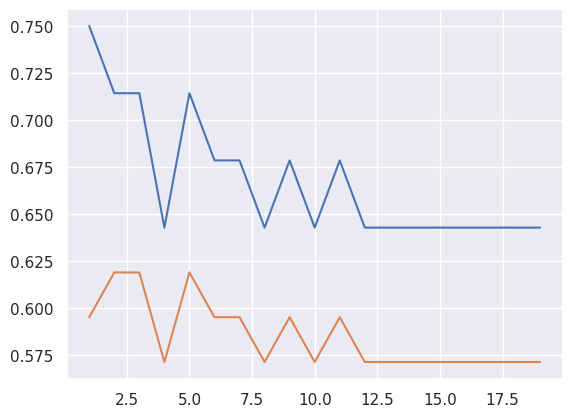

In [192]:
plt.plot(range(1,20), accuracy)
plt.plot(range(1,20), balanced_accuracy)

In [193]:
print('KNN Classification Report:\n', classification_report(Y_test, Y_pred))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.79      0.71      0.75        21

    accuracy                           0.64        28
   macro avg       0.56      0.57      0.56        28
weighted avg       0.68      0.64      0.66        28



## Gaussian Naive Bayes

In [194]:
model = GaussianNB()

In [195]:
model.fit(X_train, Y_train)

GaussianNB()

In [196]:
Y_pred = model.predict(X_test)

In [197]:
print("Train data accuracy:",accuracy_score(y_true = Y_train, y_pred=model.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = Y_test, y_pred=Y_pred))

Train data accuracy: 0.8518518518518519
Test data accuracy: 0.7142857142857143


In [198]:
confusion_matrix(Y_test, Y_pred)

array([[ 1,  6],
       [ 2, 19]])

In [199]:
print('GaussianNB Classification Report:\n', classification_report(Y_test, Y_pred))

GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.76      0.90      0.83        21

    accuracy                           0.71        28
   macro avg       0.55      0.52      0.51        28
weighted avg       0.65      0.71      0.67        28



In [200]:
print("Train data accuracy:",balanced_accuracy_score(y_true = Y_train, y_pred=model.predict(X_train)))
print("Test data accuracy:",balanced_accuracy_score(y_true = Y_test, y_pred=Y_pred))

Train data accuracy: 0.5533290239172592
Test data accuracy: 0.5238095238095238


## Decision Tree

In [201]:
model = DecisionTreeRegressor(max_depth=10)

In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True, random_state=1)

In [203]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=10)

In [204]:
Y_pred = model.predict(X_test)

In [205]:
mean_absolute_error(Y_test,Y_pred)

0.39285714285714285

In [206]:
mean_absolute_percentage_error(Y_test,Y_pred)

643371375338642.4

In [207]:
mean_squared_error(Y_test,Y_pred)**0.5

0.6267831705280087

In [208]:
r2_score(Y_test,Y_pred)

-1.3333333333333335

In [209]:
accuracy_score(Y_test,Y_pred)

0.6071428571428571

In [210]:
confusion_matrix(Y_test,Y_pred)

array([[ 2,  4],
       [ 7, 15]])

In [211]:
balanced_accuracy_score(Y_test,Y_pred)

0.5075757575757576

In [212]:
error_train=[]
error_test = []
for max_depth in range(1,20):
  reg = DecisionTreeRegressor(max_depth=max_depth)
  reg.fit(X_train,Y_train)
  Y_pred_test = reg.predict(X_test)
  Y_pred_train = reg.predict(X_train)

  error_train.append(mean_absolute_percentage_error(Y_train,Y_pred_train))
  error_test.append(mean_absolute_percentage_error(Y_test,Y_pred_test))

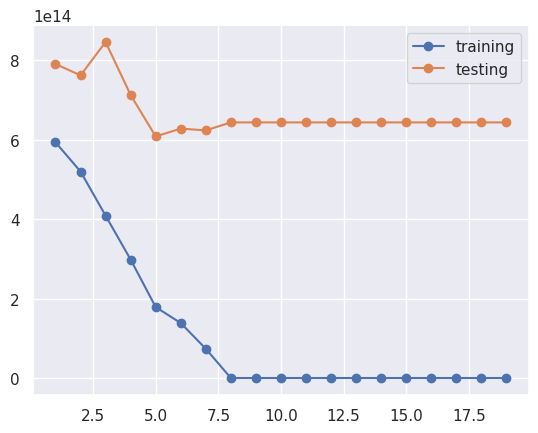

In [213]:
plt.plot(range(1,20), error_train, label='training', marker='o')
plt.plot(range(1,20), error_test, label='testing',marker='o')
plt.legend()

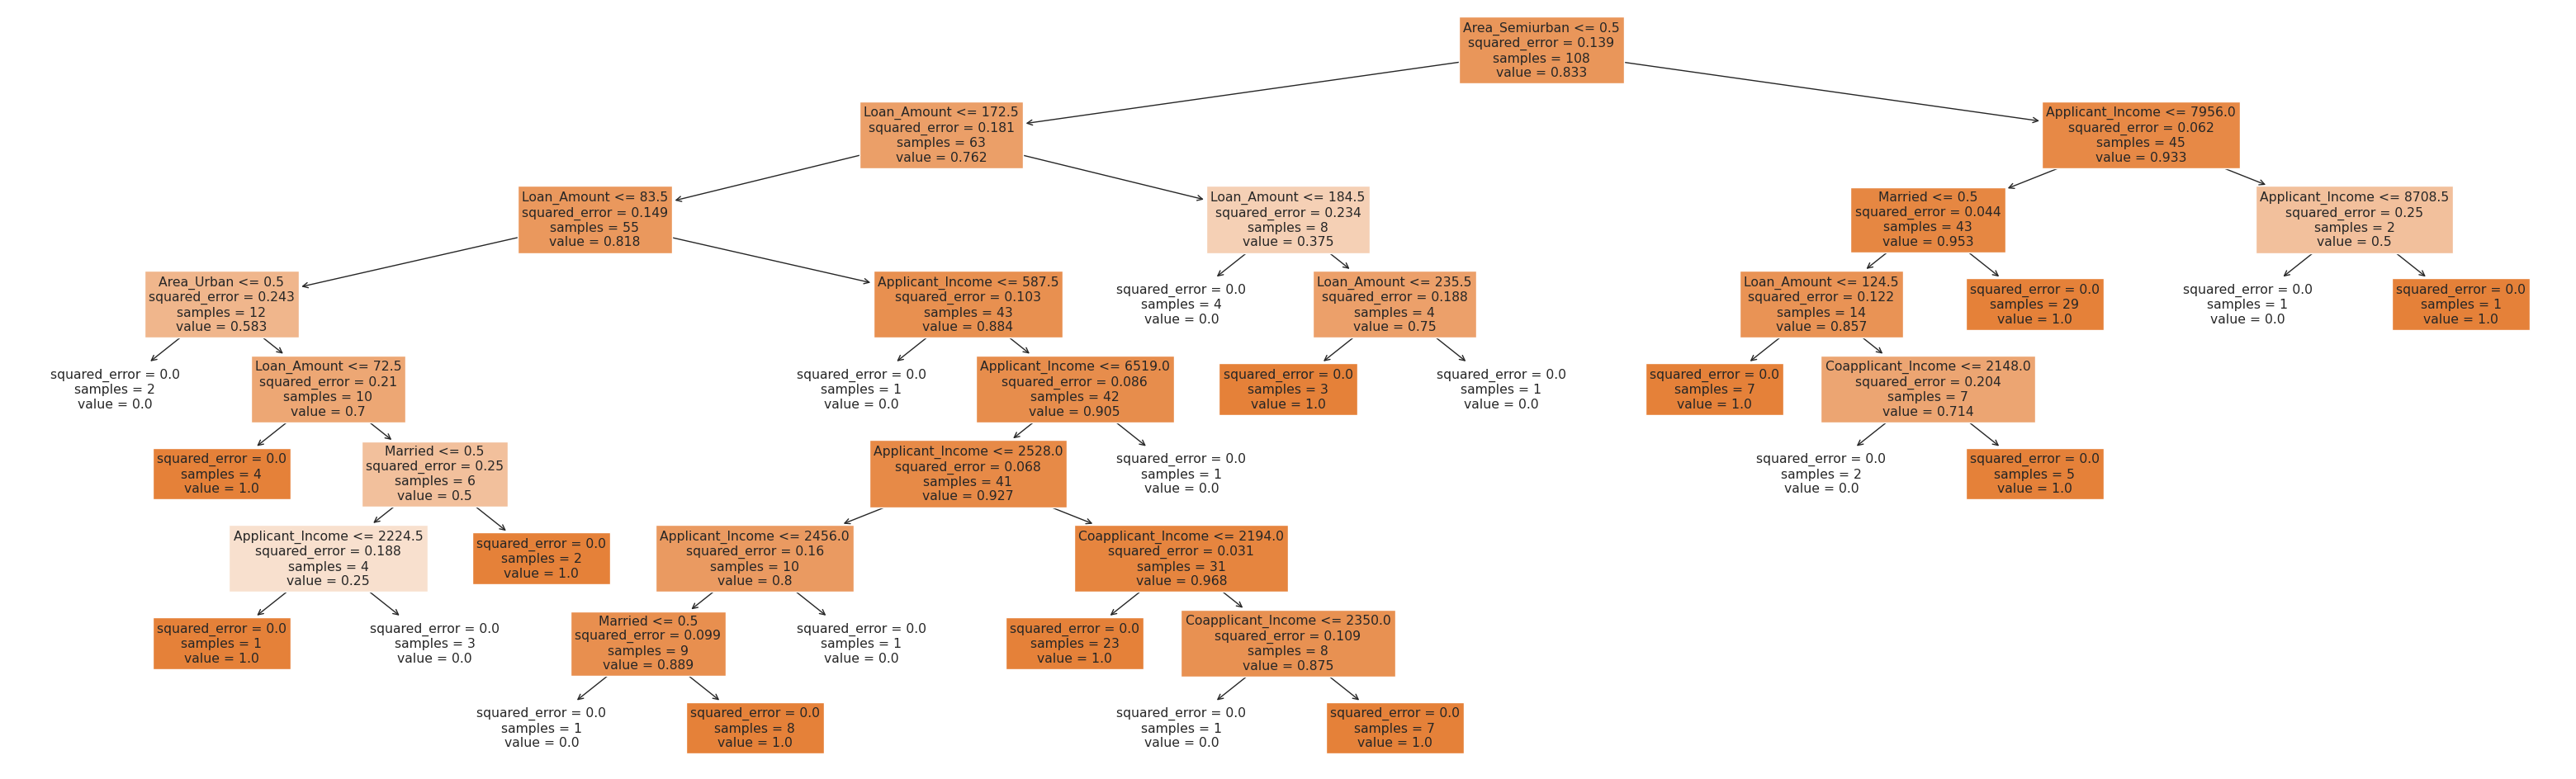

In [214]:
fig = plt.figure(figsize=(40,12))
_ = plot_tree(model, 
                   feature_names=X.columns,  
                   filled=True)

In [215]:
print('Decision Tree Classification Report:\n', classification_report(Y_test, Y_pred))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.27         6
           1       0.79      0.68      0.73        22

    accuracy                           0.61        28
   macro avg       0.51      0.51      0.50        28
weighted avg       0.67      0.61      0.63        28

